Software for managing and analysing light curves of variable stars, coming from different surveys. 

Inspect the sizes and visualize light curves from the LSST and Kepler RR Lyrae datasets.

#### Import libraries

In [1]:
import os
import pandas as pd
import lcanalyzer.views as views

/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_42190/3571106454.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the data

In [2]:
os.listdir("data")

['kepler_RRLyr.csv', 'lsst_RRLyr.pkl']

In [23]:
lc_datasets = {}
lc_datasets["lsst"] = pd.read_pickle(os.path.join("data", "lsst_RRLyr.pkl"))
lc_datasets["kepler"] = pd.read_csv(os.path.join("data", "kepler_RRLyr.csv"))

In [24]:
# Inspect datasets
lc_datasets["lsst"].head()

,band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,psfMag,ccdVisitId2,band2,expMidptMJD,zeroPoint
0,y,1032263018,62.462569,-44.11336,1251384969897480052,-515.183603,1697.218490,NaN,1032263018,y,61100.069706,30.602301
1,y,1033987172,62.462569,-44.11336,1251384969897480052,3151.738459,1686.955775,22.653625,1033987172,y,61102.068464,30.606100
2,u,675163080,62.462569,-44.11336,1251384969897480052,183.449123,209.242045,25.741211,675163080,u,60582.247144,30.469101
3,y,443055067,62.462569,-44.11336,1251384969897480052,-704.848327,1624.400086,NaN,443055067,y,60215.203585,30.612801
4,u,466722002,62.462569,-44.11336,1251384969897480052,382.472233,278.926670,24.943500,466722002,u,60261.078221,30.461201


In [25]:
LcDatasets["kepler"].head()

,time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,...,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
0,131.512404,10180609.0,78.926155,128,0.001410,653.372470,51.053028,1105,10129629.0,79.186980,...,NaN,NaN,NaN,NaN,653.372470,0.000006,51.053028,0.000063,0.011782,-0.010195
1,131.532839,10013518.0,78.233770,128,0.001411,653.372292,51.053872,1106,9949931.0,78.459984,...,NaN,NaN,NaN,NaN,653.372292,0.000006,51.053872,0.000062,0.011726,-0.010246
2,131.553273,9852474.0,77.673160,128,0.001412,653.372167,51.044559,1107,9783633.0,77.827200,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.044559,0.000062,0.011575,-0.010089
3,131.573707,9722936.0,77.109710,128,0.001413,653.371408,51.045081,1108,9651452.0,77.313590,...,NaN,NaN,NaN,NaN,653.371408,0.000006,51.045081,0.000062,0.011366,-0.009939
4,131.594142,9717073.0,77.103550,0,0.001414,653.372167,51.052828,1109,9646289.0,77.262634,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.052828,0.000062,0.011526,-0.010702


In [26]:
lc_datasets["kepler"].columns

Index(['time', 'flux', 'flux_err', 'quality', 'timecorr', 'centroid_col',
       'centroid_row', 'cadenceno', 'sap_flux', 'sap_flux_err', 'sap_bkg',
       'sap_bkg_err', 'pdcsap_flux', 'pdcsap_flux_err', 'sap_quality',
       'psf_centr1', 'psf_centr1_err', 'psf_centr2', 'psf_centr2_err',
       'mom_centr1', 'mom_centr1_err', 'mom_centr2', 'mom_centr2_err',
       'pos_corr1', 'pos_corr2'],
      dtype='object')

#### Parameters

In [34]:
plot_filter_labels = ["u", "g", "r", "i", "z", "y"]
plot_filter_colors = {
    "u": "#56b4e9", 
    "g": "#008060", 
    "r": "#ff4000", 
    "i": "#850000",
    "z": "#6600cc",
    "y": "#000000",
}
plot_filter_symbols = {"u":"o","g":"^","r":"v","i":"s","z":"*","y": "p"}

In [27]:
LC = lc_datasets["lsst"]["objectId"].unique()[7]
LC = lc_datasets["lsst"][LcDatasets["lsst"]["objectId"] == LC]

In [28]:
bands = {}
for b in plot_filter_labels:
    bands[b] = LC["band"] == b

In [29]:
len(LC)

421

In [31]:
b = 'z'

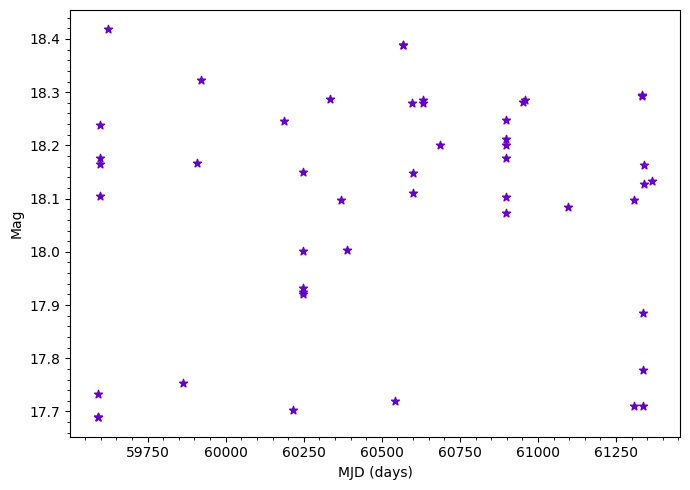

In [32]:
views.plotUnfolded(LC[bands[b]],time_col="expMidptMJD",mag_col="psfMag",color=plot_filter_colors[b],marker=plot_filter_symbols[b])


    %magic: prints information about magics system
    %lsmagic: lists all magic commands in a convenient form
    %quickref: another helper function that shows references for the magic commands
    %time, %timeit and %%timeit: measure the execution time of the code.
    %cd, %ls, %pwd and other console commands: executes terminal commands
    %run: executes another ‘.ipynb’ or ‘.py’ file from within the current notebook
    %who: lists the defined variables. It is possible to list only variables of a certain type, e.g. %who string


In [1]:
print(plot_filter_labels)

NameError: name 'plot_filter_labels' is not defined